In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from math import nan

from CASutils import contour_vs_time_utils as contourvstime
from CASutils import averaging_utils as avg
from CASutils import qbo_utils as qbo
from CASutils import nsq_vortgradient_utils as vortgrad
from CASutils import colorbar_utils as cbars
import importlib
importlib.reload(contourvstime)

import sys

In [2]:
plotpath="/project/cas/islas/python_plots/CAM7_vertres_paper/FIGURES/"

In [3]:
era5 = xr.open_dataset("/project/cas/islas/python_savs/CAM7_vertres_paper/DATA_SORT/MRG_filter/U50_MRGfilt_100day_segments_ERA5.nc")
dz1000 = xr.open_dataset("/project/cas/islas/python_savs/CAM7_vertres_paper/DATA_SORT/MRG_filter/U50_MRGfilt_100day_segments_dz1000.nc")
dz900 = xr.open_dataset("/project/cas/islas/python_savs/CAM7_vertres_paper/DATA_SORT/MRG_filter/U50_MRGfilt_100day_segments_dz900.nc")
dz800 = xr.open_dataset("/project/cas/islas/python_savs/CAM7_vertres_paper/DATA_SORT/MRG_filter/U50_MRGfilt_100day_segments_dz800.nc")
dz700 = xr.open_dataset("/project/cas/islas/python_savs/CAM7_vertres_paper/DATA_SORT/MRG_filter/U50_MRGfilt_100day_segments_dz700.nc")
dz600 = xr.open_dataset("/project/cas/islas/python_savs/CAM7_vertres_paper/DATA_SORT/MRG_filter/U50_MRGfilt_100day_segments_dz600.nc")
dz500 = xr.open_dataset("/project/cas/islas/python_savs/CAM7_vertres_paper/DATA_SORT/MRG_filter/U50_MRGfilt_100day_segments_dz500.nc")
dz400 = xr.open_dataset("/project/cas/islas/python_savs/CAM7_vertres_paper/DATA_SORT/MRG_filter/U50_MRGfilt_100day_segments_dz400.nc")

In [4]:
era5_tr = avg.cosweightlat(era5.U.mean('lon'), -5, 5)
dz1000_tr = avg.cosweightlat(dz1000.U.mean('lon'),-5,5)
dz900_tr = avg.cosweightlat(dz900.U.mean('lon'), -5, 5)
dz800_tr = avg.cosweightlat(dz800.U.mean('lon'), -5, 5)
dz700_tr = avg.cosweightlat(dz700.U.mean('lon'), -5, 5)
dz600_tr = avg.cosweightlat(dz600.U.mean('lon'), -5, 5)
dz500_tr = avg.cosweightlat(dz500.U.mean('lon'), -5, 5)
dz400_tr = avg.cosweightlat(dz400.U.mean('lon'), -5, 5)

DataArrayWeighted with weights along dimensions: lat
DataArrayWeighted with weights along dimensions: lat
DataArrayWeighted with weights along dimensions: lat
DataArrayWeighted with weights along dimensions: lat
DataArrayWeighted with weights along dimensions: lat
DataArrayWeighted with weights along dimensions: lat
DataArrayWeighted with weights along dimensions: lat
DataArrayWeighted with weights along dimensions: lat


In [5]:
def composite_qbo(dat_u_zm, dat_u, dat_mrg, vortgrad, vortgradprob, nlag):
    e2w, w2e = qbo.finde2w(dat_u_zm)
    e2w = e2w[ (e2w > nlag) & (e2w < dat_u_zm.time.size - nlag) ] 
    
    lagarr = np.arange(-nlag, nlag+1,1)
    for icomp in np.arange(0,len(e2w),1):
        datuse_u = dat_u.isel(time=slice(int(e2w[icomp] - nlag), int(e2w[icomp]) + nlag + 1))
        datuse_mrg = dat_mrg.isel(time=slice(int(e2w[icomp] - nlag), int(e2w[icomp]) + nlag + 1))
        datuse_vortgrad = vortgrad.isel(time=slice(int(e2w[icomp] - nlag), int(e2w[icomp]) + nlag + 1))
        datuse_vortgradprob = vortgradprob.isel(time=slice(int(e2w[icomp] - nlag), int(e2w[icomp]) + nlag + 1))
        datuse_u['time'] = lagarr
        datuse_mrg['time'] = lagarr
        datuse_vortgrad['time'] = lagarr
        datuse_vortgradprob['time'] = lagarr
        if (icomp == 0):
            dat_comp_u = datuse_u / len(e2w)
            dat_comp_mrg = datuse_mrg / len(e2w)
            dat_comp_vortgrad = datuse_vortgrad / len(e2w)
            dat_comp_vortgradprob = datuse_vortgradprob / len(e2w)
        else:
            dat_comp_u = dat_comp_u + datuse_u / len(e2w)
            dat_comp_mrg = dat_comp_mrg + datuse_mrg / len(e2w)
            dat_comp_vortgrad = dat_comp_vortgrad + datuse_vortgrad / len(e2w)
            dat_comp_vortgradprob = dat_comp_vortgradprob + datuse_vortgradprob / len(e2w)
    return dat_comp_u, dat_comp_mrg, dat_comp_vortgrad, dat_comp_vortgradprob

In [6]:
era5_vortgrad = vortgrad.barotropicvortgradient(era5.U.mean('lon'))
dz1000_vortgrad = vortgrad.barotropicvortgradient(dz1000.U.mean('lon'))
dz900_vortgrad = vortgrad.barotropicvortgradient(dz900.U.mean('lon'))
dz800_vortgrad = vortgrad.barotropicvortgradient(dz800.U.mean('lon'))
dz700_vortgrad = vortgrad.barotropicvortgradient(dz700.U.mean('lon'))
dz600_vortgrad = vortgrad.barotropicvortgradient(dz600.U.mean('lon'))
dz500_vortgrad = vortgrad.barotropicvortgradient(dz500.U.mean('lon'))
dz400_vortgrad = vortgrad.barotropicvortgradient(dz400.U.mean('lon'))

In [7]:
era5_comp_u, era5_comp_mrg, era5_comp_vortgrad, era5_comp_vortgradprob = \
    composite_qbo(era5_tr, era5.U.mean('lon'), era5.U_mrgfilt.mean('lon'), era5_vortgrad, era5.prob_vortgradneg, 10)

dz1000_comp_u, dz1000_comp_mrg, dz1000_comp_vortgrad, dz1000_comp_vortgradprob = \
    composite_qbo(dz1000_tr, dz1000.U.mean('lon'), dz1000.U_mrgfilt.mean('lon'), dz1000_vortgrad, dz1000.prob_vortgradneg, 10)

dz900_comp_u, dz900_comp_mrg, dz900_comp_vortgrad, dz900_comp_vortgradprob = \
    composite_qbo(dz900_tr, dz900.U.mean('lon'), dz900.U_mrgfilt.mean('lon'), dz900_vortgrad, dz900.prob_vortgradneg, 10)

dz800_comp_u, dz800_comp_mrg, dz800_comp_vortgrad, dz800_comp_vortgradprob = \
    composite_qbo(dz800_tr, dz800.U.mean('lon'), dz800.U_mrgfilt.mean('lon'), dz800_vortgrad, dz800.prob_vortgradneg, 10)

dz700_comp_u, dz700_comp_mrg, dz700_comp_vortgrad, dz700_comp_vortgradprob = \
    composite_qbo(dz700_tr, dz700.U.mean('lon'), dz700.U_mrgfilt.mean('lon'), dz700_vortgrad, dz700.prob_vortgradneg, 10)

dz600_comp_u, dz600_comp_mrg, dz600_comp_vortgrad, dz600_comp_vortgradprob = \
    composite_qbo(dz600_tr, dz600.U.mean('lon'), dz600.U_mrgfilt.mean('lon'), dz600_vortgrad, dz600.prob_vortgradneg, 10)

dz500_comp_u, dz500_comp_mrg, dz500_comp_vortgrad, dz500_comp_vortgradprob = \
    composite_qbo(dz500_tr, dz500.U.mean('lon'), dz500.U_mrgfilt.mean('lon'), dz500_vortgrad, dz500.prob_vortgradneg, 10)

dz400_comp_u, dz400_comp_mrg, dz400_comp_vortgrad, dz400_comp_vortgradprob = \
    composite_qbo(dz400_tr, dz400.U.mean('lon'), dz400.U_mrgfilt.mean('lon'), dz400_vortgrad, dz400.prob_vortgradneg, 10)

#dz900_comp_u, dz900_comp_mrg, dz900_comp_vortgrad = composite_qbo(dz900_tr, dz900.U.mean('lon'), dz900.U_mrgfilt.mean('lon'), dz900_vortgrad, 10)
#dz500_comp_u, dz500_comp_mrg, dz500_comp_vortgrad = composite_qbo(dz500_tr, dz500.U.mean('lon'), dz500.U_mrgfilt.mean('lon'), dz500_vortgrad, 10)

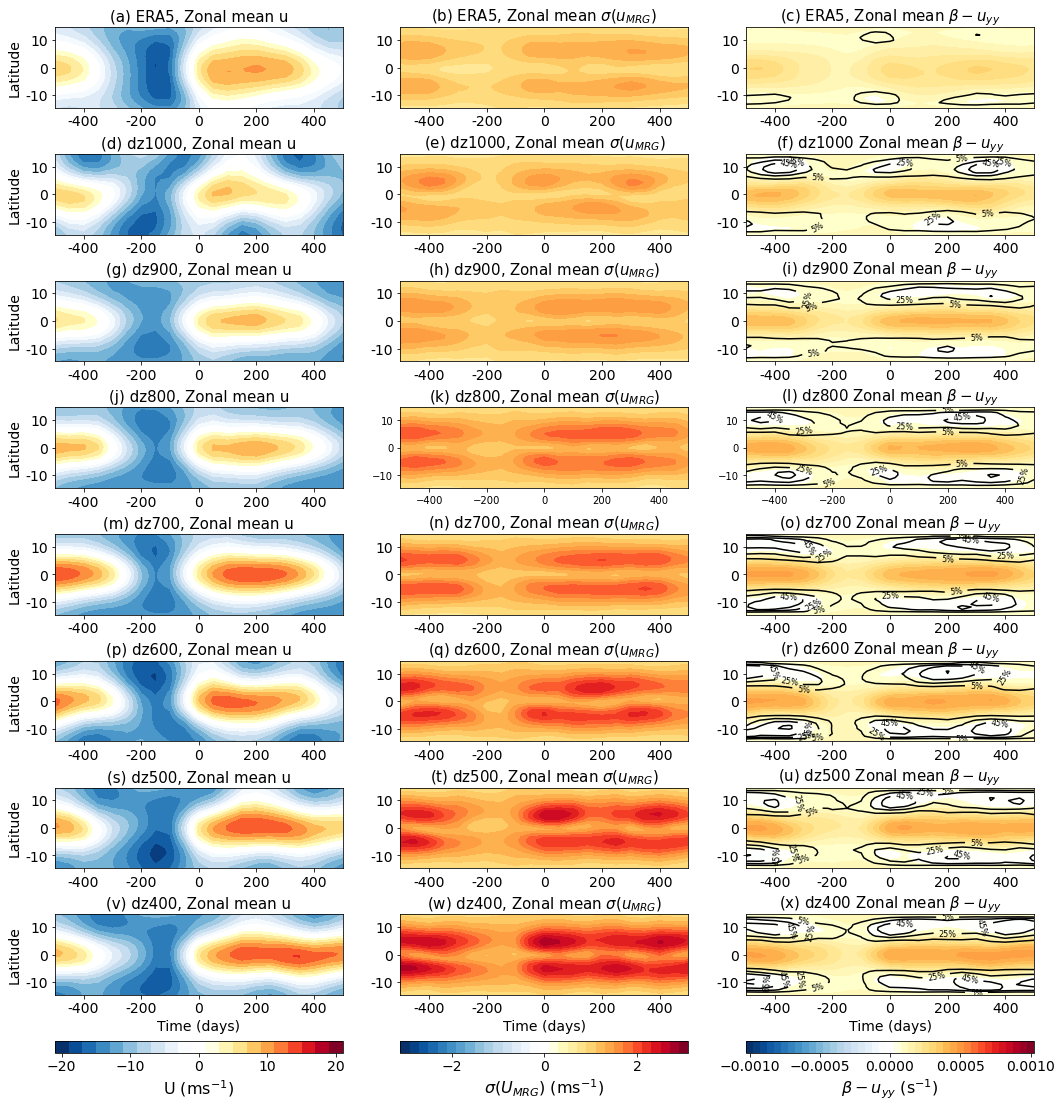

In [8]:
fig = plt.figure(figsize=(16,16))

ax = contourvstime.contour_lat_time(fig, era5_comp_u, era5_comp_u.time*50, 2, -20, 20, '(a) ERA5, Zonal mean u',0.05,0.3,0.86,0.93,
                                    yticks=[-10,0,10],yticklabels=['-10','0','10'],xticks=[-400,-200,0,200,400],xticklabels=['-400','-200','0','200','400'],
                                   ylabel='Latitude')
ax = contourvstime.contour_lat_time(fig, era5_comp_mrg, era5_comp_u.time*50, 0.2, -3, 3, '(b) ERA5, Zonal mean $\sigma(u_{MRG})$',
                                    0.35,0.6,0.86,0.93,
                                   yticks=[-10,0,10],yticklabels=['-10','0','10'],xticks=[-400,-200,0,200,400],xticklabels=['-400','-200','0','200','400'])
ax = contourvstime.contour_lat_time(fig, era5_comp_vortgrad, era5_comp_vortgrad.time*50, 5e-5,-1e-3,1e-3,'(c) ERA5, Zonal mean $\\beta - u_{yy}$',
                                    0.65,0.9,0.86,0.93,
                                   yticks=[-10,0,10],yticklabels=['-10','0','10'],xticks=[-400,-200,0,200,400],xticklabels=['-400','-200','0','200','400'])
ax.contour(era5_comp_vortgrad.time*50, era5_comp_vortgrad.lat, era5_comp_vortgradprob.transpose('lat','time'),
           levels=np.arange(5,105,20), colors='black')


ax = contourvstime.contour_lat_time(fig, dz1000_comp_u, dz1000_comp_u.time*50, 2, -20, 20, '(d) dz1000, Zonal mean u',0.05,0.3,0.75,0.82,
                                   yticks=[-10,0,10],yticklabels=['-10','0','10'],xticks=[-400,-200,0,200,400],xticklabels=['-400','-200','0','200','400'],
                                   ylabel='Latitude')
ax = contourvstime.contour_lat_time(fig, dz1000_comp_mrg, dz1000_comp_u.time*50, 0.2, -3, 3, '(e) dz1000, Zonal mean $\sigma(u_{MRG})$',
                                    0.35,0.6,0.75,0.82,
                                   yticks=[-10,0,10],yticklabels=['-10','0','10'],xticks=[-400,-200,0,200,400],xticklabels=['-400','-200','0','200','400'])
ax = contourvstime.contour_lat_time(fig, dz1000_comp_vortgrad, dz1000_comp_vortgrad.time*50, 5e-5,-1e-3,1e-3,'(f) dz1000 Zonal mean $\\beta - u_{yy}$',
                                    0.65,0.9,0.75,0.82,
                                   yticks=[-10,0,10],yticklabels=['-10','0','10'],xticks=[-400,-200,0,200,400],xticklabels=['-400','-200','0','200','400'])
contour = ax.contour(dz1000_comp_vortgrad.time*50, dz1000_comp_vortgrad.lat, dz1000_comp_vortgradprob.transpose('lat','time'),
           levels=np.arange(5,105,20), colors='black')
ax.clabel(contour, inline=True, fontsize=8, fmt='%1.0f%%')


ax = contourvstime.contour_lat_time(fig, dz900_comp_u, dz900_comp_u.time*50, 2, -20, 20, '(g) dz900, Zonal mean u',0.05,0.3,0.64,0.71,
                                   yticks=[-10,0,10],yticklabels=['-10','0','10'],xticks=[-400,-200,0,200,400],xticklabels=['-400','-200','0','200','400'],
                                   ylabel='Latitude')
ax = contourvstime.contour_lat_time(fig, dz900_comp_mrg, dz900_comp_u.time*50, 0.2, -3, 3, '(h) dz900, Zonal mean $\sigma(u_{MRG})$',
                                    0.35,0.6,0.64,0.71,
                                   yticks=[-10,0,10],yticklabels=['-10','0','10'],xticks=[-400,-200,0,200,400],xticklabels=['-400','-200','0','200','400'])
ax = contourvstime.contour_lat_time(fig, dz900_comp_vortgrad, dz900_comp_vortgrad.time*50, 5e-5,-1e-3,1e-3,'(i) dz900 Zonal mean $\\beta - u_{yy}$',
                                    0.65,0.9,0.64,0.71,
                                   yticks=[-10,0,10],yticklabels=['-10','0','10'],xticks=[-400,-200,0,200,400],xticklabels=['-400','-200','0','200','400'])
contour = ax.contour(dz900_comp_vortgrad.time*50, dz900_comp_vortgrad.lat, dz900_comp_vortgradprob.transpose('lat','time'),
           levels=np.arange(5,105,20), colors='black')
ax.clabel(contour, inline=True, fontsize=8, fmt='%1.0f%%')


ax = contourvstime.contour_lat_time(fig, dz800_comp_u, dz800_comp_u.time*50, 2, -20, 20, '(j) dz800, Zonal mean u',0.05,0.3,0.53,0.6,
                                   yticks=[-10,0,10],yticklabels=['-10','0','10'],xticks=[-400,-200,0,200,400],xticklabels=['-400','-200','0','200','400'],
                                   ylabel='Latitude')
ax = contourvstime.contour_lat_time(fig, dz800_comp_mrg, dz800_comp_u.time*50, 0.2, -3, 3, '(k) dz800, Zonal mean $\sigma(u_{MRG})$',
                                    0.35,0.6,0.53,0.6)
ax = contourvstime.contour_lat_time(fig, dz800_comp_vortgrad, dz800_comp_vortgrad.time*50, 5e-5,-1e-3,1e-3,'(l) dz800 Zonal mean $\\beta - u_{yy}$',
                                    0.65,0.9,0.53,0.6)
contour = ax.contour(dz800_comp_vortgrad.time*50, dz800_comp_vortgrad.lat, dz800_comp_vortgradprob.transpose('lat','time'),
           levels=np.arange(5,105,20), colors='black')
ax.clabel(contour, inline=True, fontsize=8, fmt='%1.0f%%')


ax = contourvstime.contour_lat_time(fig, dz700_comp_u, dz700_comp_u.time*50, 2, -20, 20, '(m) dz700, Zonal mean u',0.05,0.3,0.42,0.49,
                                   yticks=[-10,0,10],yticklabels=['-10','0','10'],xticks=[-400,-200,0,200,400],xticklabels=['-400','-200','0','200','400'],
                                   ylabel='Latitude')
ax = contourvstime.contour_lat_time(fig, dz700_comp_mrg, dz700_comp_u.time*50, 0.2, -3, 3, '(n) dz700, Zonal mean $\sigma(u_{MRG})$',
                                    0.35,0.6,0.42,0.49,
                                   yticks=[-10,0,10],yticklabels=['-10','0','10'],xticks=[-400,-200,0,200,400],xticklabels=['-400','-200','0','200','400'])
ax = contourvstime.contour_lat_time(fig, dz700_comp_vortgrad, dz700_comp_vortgrad.time*50, 5e-5,-1e-3,1e-3,'(o) dz700 Zonal mean $\\beta - u_{yy}$',
                                    0.65,0.9,0.42,0.49,
                                   yticks=[-10,0,10],yticklabels=['-10','0','10'],xticks=[-400,-200,0,200,400],xticklabels=['-400','-200','0','200','400'])
contour = ax.contour(dz700_comp_vortgrad.time*50, dz700_comp_vortgrad.lat, dz700_comp_vortgradprob.transpose('lat','time'),
           levels=np.arange(5,105,20), colors='black')
ax.clabel(contour, inline=True, fontsize=8, fmt='%1.0f%%')

ax = contourvstime.contour_lat_time(fig, dz600_comp_u, dz600_comp_u.time*50, 2, -20, 20, '(p) dz600, Zonal mean u',0.05,0.3,0.31,0.38,
                                   yticks=[-10,0,10],yticklabels=['-10','0','10'],xticks=[-400,-200,0,200,400],xticklabels=['-400','-200','0','200','400'],
                                   ylabel='Latitude')
ax = contourvstime.contour_lat_time(fig, dz600_comp_mrg, dz600_comp_u.time*50, 0.2, -3, 3, '(q) dz600, Zonal mean $\sigma(u_{MRG})$',
                                    0.35,0.6,0.31,0.38,
                                   yticks=[-10,0,10],yticklabels=['-10','0','10'],xticks=[-400,-200,0,200,400],xticklabels=['-400','-200','0','200','400'])
ax = contourvstime.contour_lat_time(fig, dz600_comp_vortgrad, dz600_comp_vortgrad.time*50, 5e-5,-1e-3,1e-3,'(r) dz600 Zonal mean $\\beta - u_{yy}$',
                                    0.65,0.9,0.31,0.38,
                                   yticks=[-10,0,10],yticklabels=['-10','0','10'],xticks=[-400,-200,0,200,400],xticklabels=['-400','-200','0','200','400'])
contour = ax.contour(dz600_comp_vortgrad.time*50, dz600_comp_vortgrad.lat, dz600_comp_vortgradprob.transpose('lat','time'),
           levels=np.arange(5,105,20), colors='black')
ax.clabel(contour, inline=True, fontsize=8, fmt='%1.0f%%')


ax = contourvstime.contour_lat_time(fig, dz500_comp_u, dz500_comp_u.time*50, 2, -20, 20, '(s) dz500, Zonal mean u',0.05,0.3,0.2,0.27,
                                   yticks=[-10,0,10],yticklabels=['-10','0','10'],xticks=[-400,-200,0,200,400],xticklabels=['-400','-200','0','200','400'],
                                   ylabel='Latitude')
ax = contourvstime.contour_lat_time(fig, dz500_comp_mrg, dz500_comp_u.time*50, 0.2, -3, 3, '(t) dz500, Zonal mean $\sigma(u_{MRG})$',
                                    0.35,0.6,0.2,0.27,
                                   yticks=[-10,0,10],yticklabels=['-10','0','10'],xticks=[-400,-200,0,200,400],xticklabels=['-400','-200','0','200','400'])
ax = contourvstime.contour_lat_time(fig, dz500_comp_vortgrad, dz500_comp_vortgrad.time*50, 5e-5,-1e-3,1e-3,'(u) dz500 Zonal mean $\\beta - u_{yy}$',
                                    0.65,0.9,0.2,0.27,
                                   yticks=[-10,0,10],yticklabels=['-10','0','10'],xticks=[-400,-200,0,200,400],xticklabels=['-400','-200','0','200','400'])
contour = ax.contour(dz500_comp_vortgrad.time*50, dz500_comp_vortgrad.lat, dz500_comp_vortgradprob.transpose('lat','time'),
           levels=np.arange(5,105,20), colors='black')
ax.clabel(contour, inline=True, fontsize=8, fmt='%1.0f%%')


ax = contourvstime.contour_lat_time(fig, dz400_comp_u, dz400_comp_u.time*50, 2, -20, 20, '(v) dz400, Zonal mean u',0.05,0.3,0.09,0.16,
                                   yticks=[-10,0,10],yticklabels=['-10','0','10'],xticks=[-400,-200,0,200,400],xticklabels=['-400','-200','0','200','400'],
                                   ylabel='Latitude')
ax.set_xlabel('Time (days)', fontsize=14)
ax = contourvstime.contour_lat_time(fig, dz400_comp_mrg, dz400_comp_u.time*50, 0.2, -3, 3, '(w) dz400, Zonal mean $\sigma(u_{MRG})$',
                                    0.35,0.6,0.09,0.16,
                                   yticks=[-10,0,10],yticklabels=['-10','0','10'],xticks=[-400,-200,0,200,400],xticklabels=['-400','-200','0','200','400'])
ax.set_xlabel('Time (days)', fontsize=14)
ax = contourvstime.contour_lat_time(fig, dz400_comp_vortgrad, dz400_comp_vortgrad.time*50, 5e-5,-1e-3,1e-3,'(x) dz400 Zonal mean $\\beta - u_{yy}$',
                                    0.65,0.9,0.09,0.16,
                                   yticks=[-10,0,10],yticklabels=['-10','0','10'],xticks=[-400,-200,0,200,400],xticklabels=['-400','-200','0','200','400'])
ax.set_xlabel('Time (days)', fontsize=14)

contour = ax.contour(dz400_comp_vortgrad.time*50, dz400_comp_vortgrad.lat, dz400_comp_vortgradprob.transpose('lat','time'),
           levels=np.arange(5,105,20), colors='black')
ax.clabel(contour, inline=True, fontsize=8, fmt='%1.0f%%')

ax = cbars.plotcolorbar(fig, 2, -20, 20, 'U (ms$^{-1}$)', 0.05,0.3,0.04,0.05)
ax = cbars.plotcolorbar(fig, 0.2, -3, 3, '$\sigma(U_{MRG})$ (ms$^{-1}$)',0.35,0.6,0.04,0.05)
ax = cbars.plotcolorbar(fig, 5e-5,-1e-3,1e-3,'$\\beta - u_{yy}$ (s$^{-1}$)',0.65,0.9,0.04,0.05)

fig.savefig(plotpath+'fig9.pdf', bbox_inches='tight', facecolor='white')